In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('.\Data\Rios.csv',index_col=0)
df.head(5)

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524


## Histograma para ver como estan distribuidos nuestros valores 

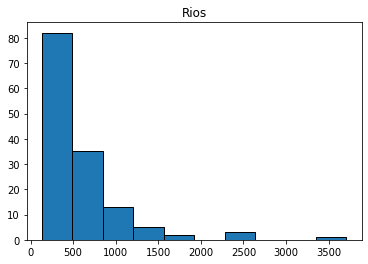

In [3]:
plt.title('Rios')      #Matplotlib
plt.hist(df['Millas'], edgecolor='black', linewidth=1);

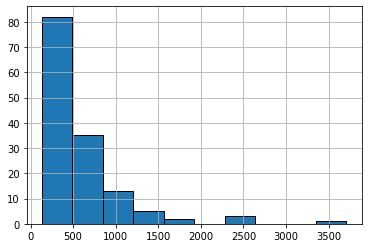

In [4]:
df['Millas'].hist(edgecolor='black', linewidth=1);     #Pandas

## Hacemos un grafico de caja para ver los outliers 

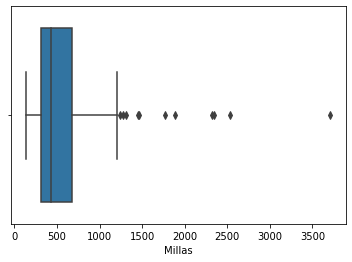

In [5]:
import seaborn as sns
sns.boxplot(df.Millas);

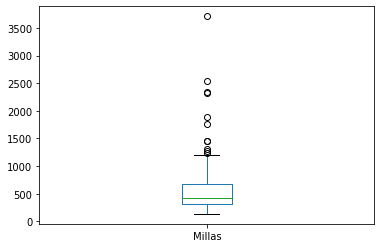

In [6]:
num_features = df[['Millas']]           #Pandas
num_features.boxplot(grid=False);

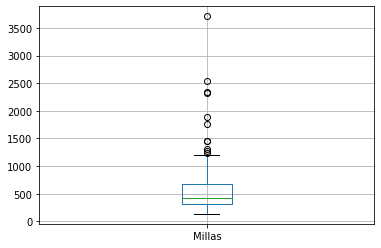

In [7]:
df.boxplot();         #Pandas 

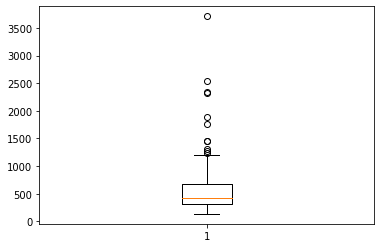

In [8]:
plt.boxplot(df['Millas']);            #Matplotlib

## Valores estadisticos de los Outliers

In [9]:
Q1 = df['Millas'].quantile(0.25)
Q3 = df['Millas'].quantile(0.75)
RI = Q3 - Q1
Mediana = df['Millas'].median()
Min = df['Millas'].min()
Max = df['Millas'].max()

In [10]:
print(f'Primer Cuartil:{Q1}')
print(f'Segundo Cuartil:{Q3}')
print(f'Rango Intercuartil: {RI}')
print(f'Mediana:{Mediana}')
print(f'Min:{Min}')
print(f'Max:{Max}')

Primer Cuartil:310.0
Segundo Cuartil:680.0
Rango Intercuartil: 370.0
Mediana:425.0
Min:135
Max:3710


## Calculo de limites

In [11]:
lim_inf = Q1 - 1.5 * RI        #Para los valores que aparecen en el box, lim inf [-245 o 135min] se queda con 135
lim_sup = Q3 + 1.5 * RI        #lim sup [1235 o 3710max] se queda con 1235
[lim_inf,lim_sup]

[-245.0, 1235.0]

## Ubicación de los Outliers

In [12]:
mask_outliers = ((df['Millas'] < lim_inf) | (df['Millas'] > lim_sup))
mask_outliers

Rio
1      False
2      False
3      False
4      False
5      False
       ...  
137    False
138    False
139    False
140    False
141     True
Name: Millas, Length: 141, dtype: bool

In [13]:
df_outliers = df[mask_outliers]         #Me trae los outliers
df_outliers

,Millas
Rio,
7,1459
23,1450
25,1243
66,2348
68,3710
69,2315
70,2533
83,1306
98,1270


In [14]:
df_outliers.sort_values('Millas',ascending=False)

,Millas
Rio,
68,3710
70,2533
66,2348
69,2315
101,1885
141,1770
7,1459
23,1450
83,1306


## Se sacan los datos ya sin outliers

In [15]:
mask_outliers = ((df['Millas'] >= lim_inf) & (df['Millas'] <= lim_sup))
df_no_outliers = df[mask_outliers]
df_no_outliers

,Millas
Rio,
1,735
2,320
3,325
4,392
5,524
...,...
136,500
137,720
138,270


## Se vuelve a graficar para corroborar que ya no hay outliers  (Se repite el proceso hasta que se eliminan todos los outliers)

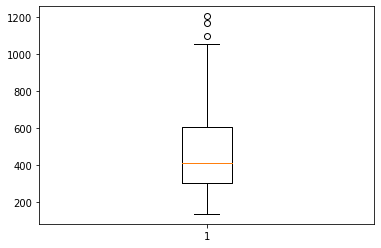

In [16]:
plt.boxplot(df_no_outliers['Millas']);

In [17]:
Q1 = df_no_outliers['Millas'].quantile(0.25)
Q3 = df_no_outliers['Millas'].quantile(0.75)
RI = Q3 - Q1
Mediana = df_no_outliers['Millas'].median()
Min = df_no_outliers['Millas'].min()
Max = df_no_outliers['Millas'].max()

In [18]:
print(f'Primer Cuartil:{Q1}')
print(f'Segundo Cuartil:{Q3}')
print(f'Rango Intercuartil: {RI}')
print(f'Mediana:{Mediana}')
print(f'Min:{Min}')
print(f'Max:{Max}')

Primer Cuartil:302.25
Segundo Cuartil:603.75
Rango Intercuartil: 301.5
Mediana:408.5
Min:135
Max:1205


In [19]:
lim_inf = Q1 - 1.5 * RI        #Para los valores que aparecen en el box, lim inf [-245 o 135min] se queda con 135
lim_sup = Q3 + 1.5 * RI        #lim sup [1235 o 3710max] se queda con 1235
[lim_inf,lim_sup]

[-150.0, 1056.0]

In [20]:
mask = ((df_no_outliers['Millas'] >= lim_inf) & (df_no_outliers['Millas'] <= lim_sup))
df_no_outliers2 = df_no_outliers[mask]

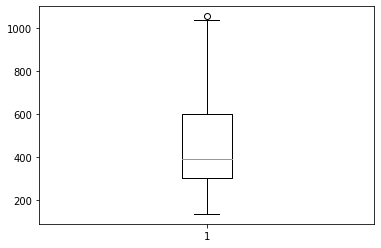

In [21]:
plt.boxplot(df_no_outliers2['Millas']);

In [22]:
Q1 = df_no_outliers2['Millas'].quantile(0.25)
Q3 = df_no_outliers2['Millas'].quantile(0.75)
RI = Q3 - Q1
Mediana = df_no_outliers2['Millas'].median()
Min = df_no_outliers2['Millas'].min()
Max = df_no_outliers2['Millas'].max()

In [23]:
lim_inf = Q1 - 1.5 * RI        #Para los valores que aparecen en el box, lim inf [-245 o 135min] se queda con 135
lim_sup = Q3 + 1.5 * RI        #lim sup [1235 o 3710max] se queda con 1235
[lim_inf,lim_sup]

[-148.75, 1049.25]

In [24]:
mask = ((df_no_outliers2['Millas'] >= lim_inf) & (df_no_outliers2['Millas'] <= lim_sup))
df_no_outliers3 = df_no_outliers2[mask]

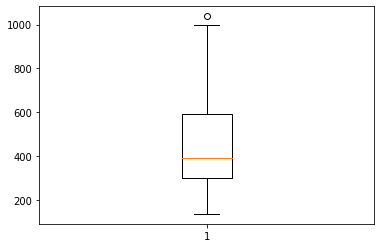

In [25]:
plt.boxplot(df_no_outliers3['Millas']);